<a href="https://colab.research.google.com/github/Dreadnought73/AI_projects/blob/main/Mental_health_survey_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the students' certainty over their future based on their survey responses

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey", path='MentalHealthSurvey.csv')

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv


In [ ]:
import pandas as pd

df = pd.read_csv(path)
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [ ]:
df.shape

(87, 21)

In [ ]:
df.columns

Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')

# Decision tree classifier

In [ ]:
df['future_insecurity'].value_counts().sort_values()

,count
future_insecurity,
1,16
4,16
5,17
2,17
3,21


Separating the values who are certain and uncertain about their futures and replacing the categorical values to numerical ones. This would also create an imbalanced class, which will be handled later.

In [ ]:
df['certain_future'] = df['future_insecurity'].replace([1,2,3,4,5], [0, 0, 0, 1, 1])

Converting categorical values to numberical ones and creating the X and y value.

In [ ]:
from sklearn.model_selection import train_test_split

y = df['certain_future']
X = pd.get_dummies(df, columns=['campus_discrimination', 'sports_engagement', 'average_sleep', 'gender'], dtype=int)
X = X.drop(['university', 'degree_level', 'degree_major', 'academic_year', 'cgpa', 'residential_status', 'stress_relief_activities', 'future_insecurity', 'certain_future'], axis=1)
X.head()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,campus_discrimination_No,campus_discrimination_Yes,sports_engagement_1-3 times,sports_engagement_4-6 times,sports_engagement_7+ times,sports_engagement_No Sports,average_sleep_2-4 hrs,average_sleep_4-6 hrs,average_sleep_7-8 hrs,gender_Female,gender_Male
0,20,5,4,5,4,3,2,1,1,1,0,0,0,0,1,0,1,0,0,1
1,20,5,4,4,1,3,3,3,3,1,0,1,0,0,0,0,1,0,0,1
2,20,5,5,5,3,4,2,3,3,1,0,1,0,0,0,1,0,0,0,1
3,20,3,5,4,4,1,5,5,5,1,0,0,0,0,1,0,1,0,0,1
4,20,3,5,5,2,3,5,5,4,0,1,0,0,0,1,0,1,0,1,0


Since there is imbalance in the values of the target variable, I use SMOTE to solve it.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# this summarizes class distribution
counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 54, 1: 33})
Counter({0: 54, 1: 54})


In [ ]:
import numpy as np

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30)
X_train.columns

Index(['age', 'study_satisfaction', 'academic_workload ', 'academic_pressure',
       'financial_concerns', 'social_relationships', 'depression', 'anxiety',
       'isolation', 'campus_discrimination_No', 'campus_discrimination_Yes',
       'sports_engagement_1-3 times', 'sports_engagement_4-6 times',
       'sports_engagement_7+ times', 'sports_engagement_No Sports',
       'average_sleep_2-4 hrs', 'average_sleep_4-6 hrs',
       'average_sleep_7-8 hrs', 'gender_Female', 'gender_Male'],
      dtype='object')

Using the Decision Tree Classifier, going through the possibilities for the model's depth to find the one with the highest accuracy.

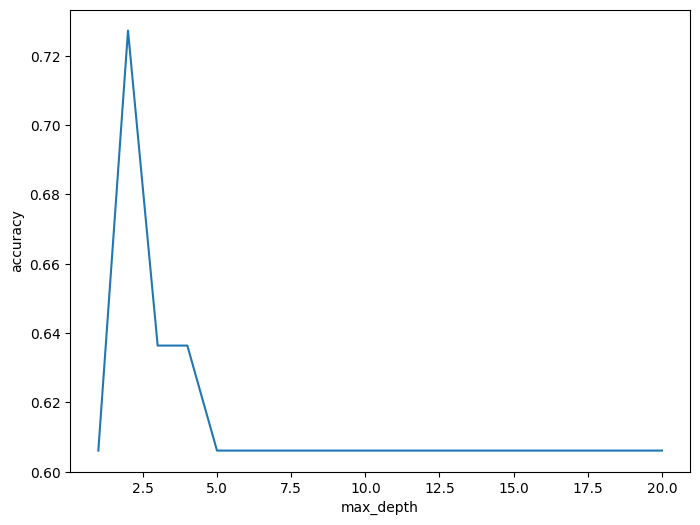

Highest accuracy 72.7% at depth 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dt = DecisionTreeClassifier(random_state = 10, max_depth = i, max_features=11)
    dt.fit(X_train, y_train)
    acc_depth.append(dt.score(X_test, y_test))

#Plot the accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(depths, acc_depth)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]
print(f'Highest accuracy {round(max_acc,3)*100}% at depth {best_depth}')

The highest accuracy was found at depth 2 with 72.7% on the test set.

In [ ]:
model = DecisionTreeClassifier(random_state = 10, max_depth = best_depth, max_features=11)
model.fit(X_train, y_train)
score_train_first = model.score(X_train, y_train)
print(f'Accuracy score for training set: {score_train_first}')
print('Accuracy score for test set: ')
model.score(X_test, y_test)

Accuracy score for training set: 0.7466666666666667
Accuracy score for test set: 


0.7272727272727273

To find out the max number of features we could use to find the best accuracy on the test set.

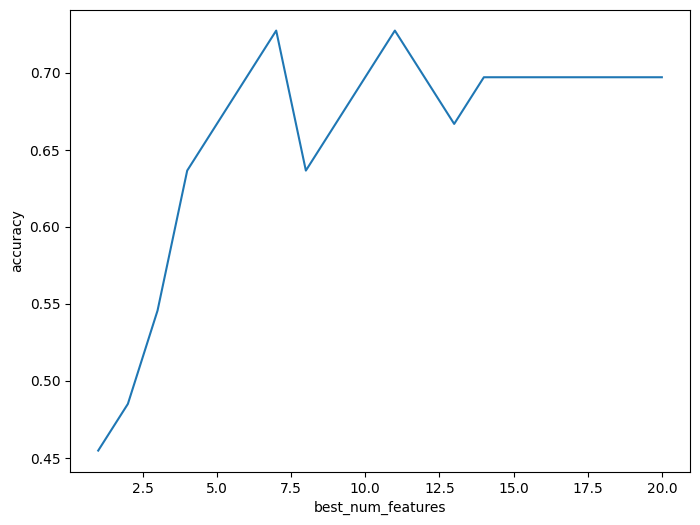

Highest accuracy 72.7% with 7 number of features


In [ ]:
best_num_features = []
num_features = range(1,21)
for i in num_features:
    dt = DecisionTreeClassifier(max_depth=2, random_state=10, max_features=i)
    dt.fit(X_train, y_train)
    best_num_features.append(dt.score(X_test, y_test))

#Plot the accuracy vs depth
plt.figure(figsize=(8,6))
plt.plot(num_features, best_num_features)
plt.xlabel('best_num_features')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(best_num_features)
best_max_features = num_features[np.argmax(best_num_features)]
print(f'Highest accuracy {round(max_acc,3)*100}% with {best_max_features} number of features')

Turns out using only 7 features is enough to reach more than 70% accuracy.

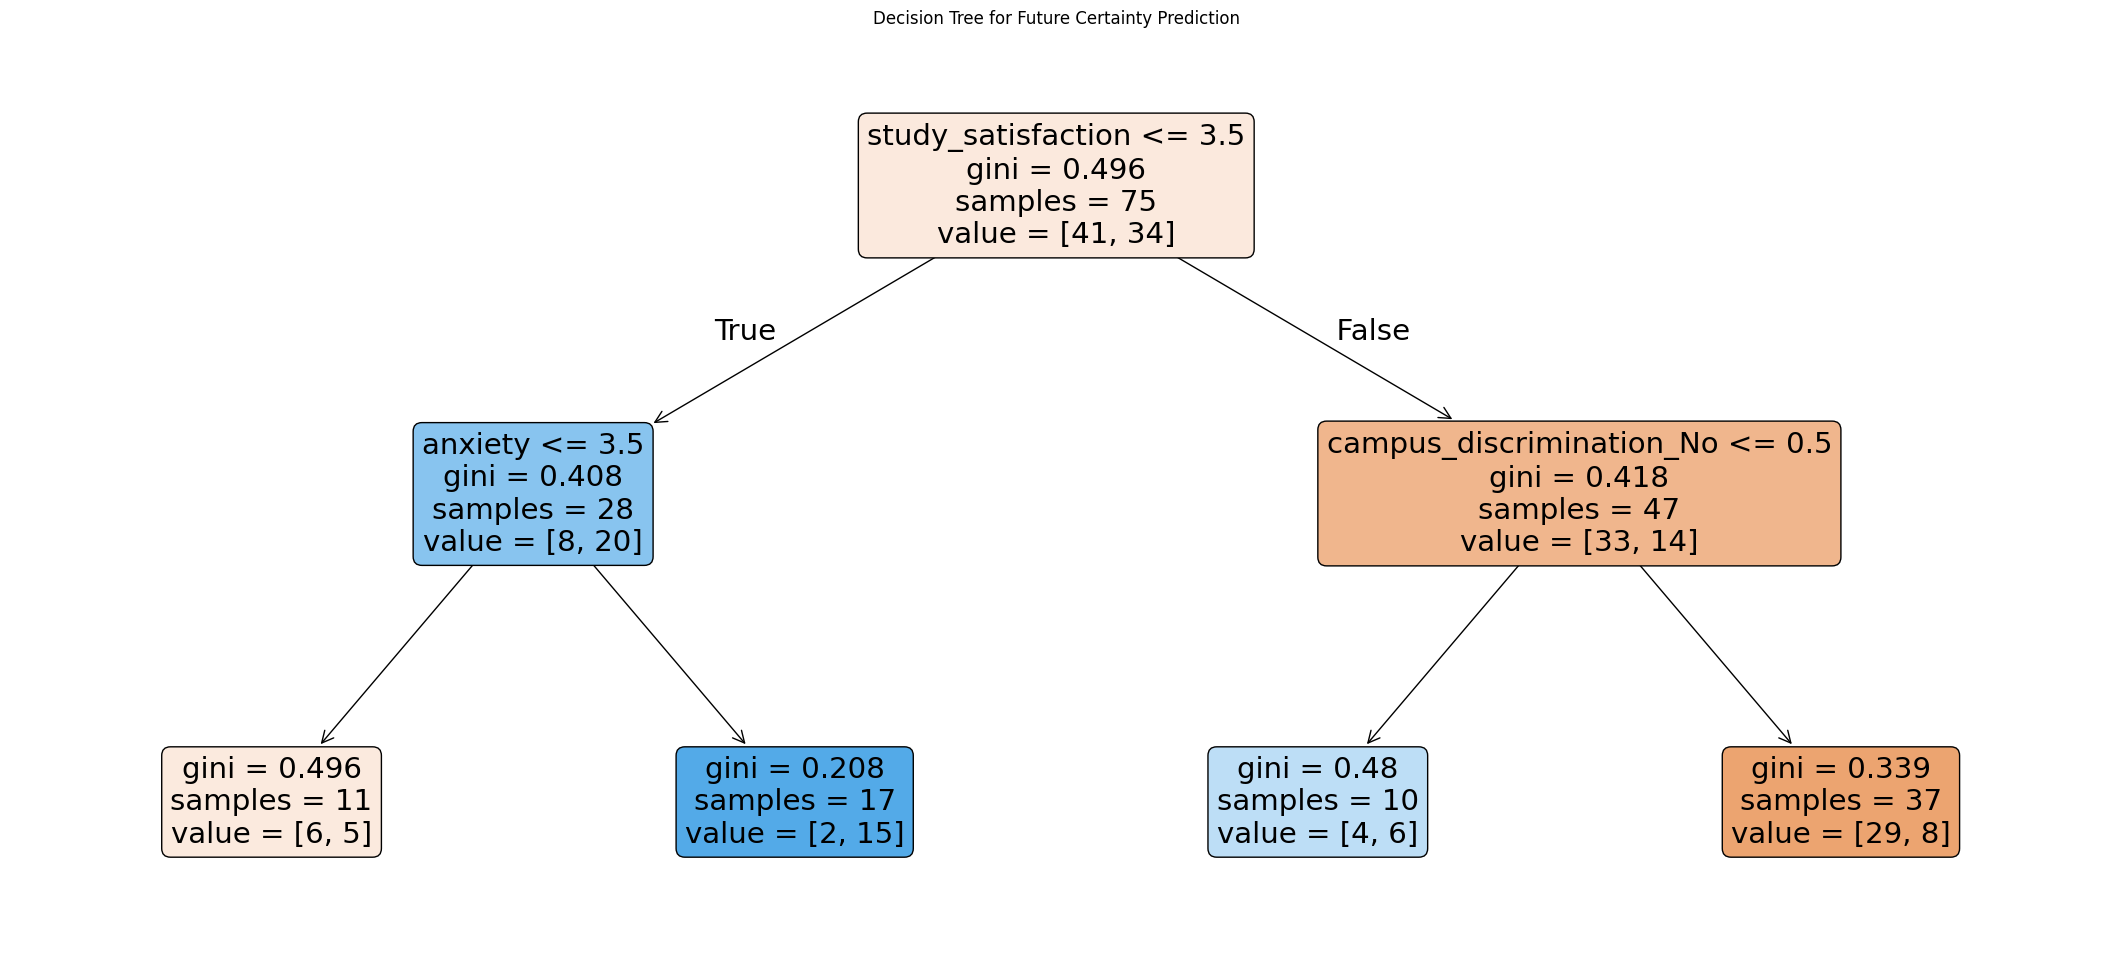

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(27, 12))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree for Future Certainty Prediction")
plt.show()

Since there was a high number of variance, we can check if pruning has any positive effect.

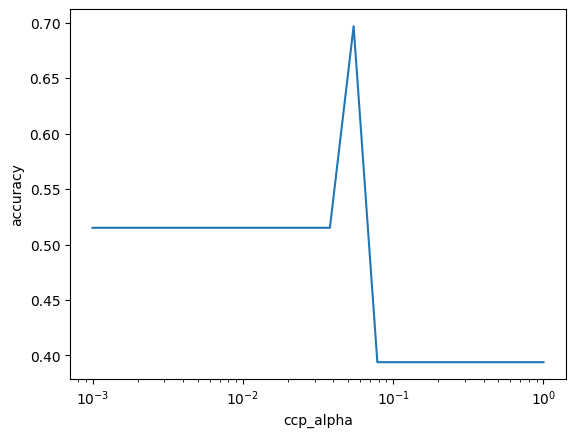

Highest accuracy 69.69999999999999% at ccp_alpha 0.0546


In [ ]:
#Create a new list for the accuracy values of a pruned decision tree.
acc_pruned = []
ccp = np.logspace(-3, 0, num=20) # find the extent of pruning
for i in ccp:
    dt_prune = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=i, max_features=7)
    dt_prune.fit(X_train, y_train)
    acc_pruned.append(dt_prune.score(X_test, y_test))

plt.plot(ccp, acc_pruned)
plt.xscale('log')
plt.xlabel('ccp_alpha')
plt.ylabel('accuracy')
plt.show()

#Find the largest accuracy and the ccp value this occurs
max_acc_pruned = np.max(acc_pruned)
best_ccp = ccp[np.argmax(acc_pruned)]

print(f'Highest accuracy {round(max_acc_pruned,3)*100}% at ccp_alpha {round(best_ccp,4)}')

Turns out to have a worse accuracy on the test, so we are sticking to the original model for now.

In [ ]:
model_final = DecisionTreeClassifier(random_state = 1, max_depth = best_depth, ccp_alpha=best_ccp, max_features=11)
model_final.fit(X_train, y_train)
score_train = model_final.score(X_train, y_train)
print(f'Accuracy score for training set: {score_train}')
print('Accuracy score for test set: ')
model_final.score(X_test, y_test)

Accuracy score for training set: 0.7733333333333333
Accuracy score for test set: 


0.696969696969697

We can also use bagging to increase test accuracy, and as we can see there is a slight increase, +3% roughly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

# 1. Bagging classifier with 10 Decision Tree base estimators
bag_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=10) # to include the number of estimators for bagging
# we can also set max_features to the number of features we’d like to keep
bag_dt.fit(X_train, y_train)
print('Accuracy score of Bagged Classifier, 10 estimators:')
bag_accuracy = bag_dt.score(X_test, y_test)
print(bag_accuracy)
# 2.Set `max_features` to 10.
bag_dt_10 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=10, max_features=11)
bag_dt_10.fit(X_train, y_train)

print('Accuracy score of Bagged Classifier, 10 estimators, 11 max features:')
bag_accuracy_10 = bag_dt_10.score(X_test, y_test)
print(bag_accuracy_10)

Accuracy score of Bagged Classifier, 10 estimators:
0.7575757575757576
Accuracy score of Bagged Classifier, 10 estimators, 11 max features:
0.7272727272727273


# Random Forest Classifier

We can finally try out with a random forest classifier, but this gives the same result as the other ensemble method with bagging.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier()
print('Random Forest parameters:')
rf_params = rf.get_params()
print(rf_params)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Test set classification report:')
rf_classification_report = classification_report(y_test, y_pred)
print(rf_classification_report)
rf_accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy:')
print(rf_accuracy)

Random Forest parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Test set classification report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.93      0.65      0.76        20

    accuracy                           0.76        33
   macro avg       0.78      0.79      0.76        33
weighted avg       0.81      0.76      0.76        33

Test set accuracy:
0.7575757575757576
